In [1]:
# ============================================================================
# TRABAJO PRACTICO FINAL - ARBOL DE DECISION - TITANIC
# Sistemas de Soporte para la Toma de Decisiones
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score)
import warnings
warnings.filterwarnings('ignore')

# Configuracion de graficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# ============================================================================
# 1. CARGA DE DATOS PREPROCESADOS
# ============================================================================

print("="*80)
print("1. CARGANDO DATOS PREPROCESADOS")
print("="*80)

# Cargar datasets ya preprocesados
df_train_prep = pd.read_csv(r"..\data\dataset_train.csv")
df_test_prep = pd.read_csv(r"..\data\dataset_test.csv")

print(f"\nDimensiones del conjunto de entrenamiento: {df_train_prep.shape}")
print(f"Dimensiones del conjunto de prueba: {df_test_prep.shape}")

print("\nColumnas del dataset:")
print(list(df_train_prep.columns))

print("\nPrimeras 5 filas:")
print(df_train_prep.head())

print("\nEstadisticas descriptivas:")
print(df_train_prep.describe())

1. CARGANDO DATOS PREPROCESADOS

Dimensiones del conjunto de entrenamiento: (891, 9)
Dimensiones del conjunto de prueba: (418, 8)

Columnas del dataset:
['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone']

Primeras 5 filas:
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  IsAlone
0         0       3    1  22.0      1      0   7.2500           2        0
1         1       1    0  38.0      1      0  71.2833           2        0
2         1       3    0  26.0      0      0   7.9250           1        1
3         1       1    0  35.0      1      0  53.1000           2        0
4         0       3    1  35.0      0      0   8.0500           1        1

Estadisticas descriptivas:
         Survived      Pclass         Sex         Age       SibSp       Parch  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838    2.308642    0.647587   29.112424    0.523008    0.381594   
std      0.486592  

In [3]:
# ============================================================================
# 2. DIVISION DE DATOS (Train 80% / Validation 20%)
# ============================================================================

print("\n" + "="*80)
print("2. DIVISION DE DATOS")
print("="*80)

X = df_train_prep.drop('Survived', axis=1)
y = df_train_prep['Survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nConjunto de entrenamiento: {X_train.shape}")
print(f"Conjunto de validacion: {X_test.shape}")
print(f"\nDistribucion en train: {y_train.value_counts().to_dict()}")
print(f"Distribucion en test: {y_test.value_counts().to_dict()}")


2. DIVISION DE DATOS

Conjunto de entrenamiento: (712, 8)
Conjunto de validacion: (179, 8)

Distribucion en train: {0: 439, 1: 273}
Distribucion en test: {0: 110, 1: 69}


In [4]:
# ============================================================================
# 3. ENTRENAMIENTO DEL ARBOL DE DECISION
# ============================================================================

print("\n" + "="*80)
print("3. ENTRENAMIENTO DEL ARBOL DE DECISION")
print("="*80)

print("\nHiperparametros del modelo:")
print("  - criterion: gini (impureza de Gini)")
print("  - max_depth: 5")
print("  - min_samples_split: 2")
print("  - min_samples_leaf: 1")
print("  - random_state: 42")

# Crear y entrenar el modelo
model = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

# Entrenar el modelo
model.fit(X_train, y_train)

print("\n✓ Modelo entrenado exitosamente")
print(f"\nNumero de nodos en el arbol: {model.tree_.node_count}")
print(f"Profundidad maxima alcanzada: {model.tree_.max_depth}")
print(f"Numero de hojas: {model.get_n_leaves()}")


3. ENTRENAMIENTO DEL ARBOL DE DECISION

Hiperparametros del modelo:
  - criterion: gini (impureza de Gini)
  - max_depth: 5
  - min_samples_split: 2
  - min_samples_leaf: 1
  - random_state: 42

✓ Modelo entrenado exitosamente

Numero de nodos en el arbol: 45
Profundidad maxima alcanzada: 5
Numero de hojas: 23


In [5]:
# ============================================================================
# 4. EVALUACION DEL MODELO
# ============================================================================

print("\n" + "="*80)
print("4. EVALUACION DEL MODELO")
print("="*80)

# Predicciones
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Probabilidades para curvas ROC
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Metricas en Train
print("\nMETRICAS EN CONJUNTO DE ENTRENAMIENTO:")
print(f"  Accuracy:  {accuracy_score(y_train, y_train_pred):.4f}")
print(f"  Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"  Recall:    {recall_score(y_train, y_train_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_train, y_train_pred):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_train, y_train_proba):.4f}")

# Metricas en Test
acc_train = accuracy_score(y_train, y_train_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print("\nMETRICAS EN CONJUNTO DE VALIDACION:")
print(f"  Accuracy:  {acc_test:.4f}")
print(f"  Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"  Recall:    {recall_score(y_test, y_test_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_test_pred):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_test_proba):.4f}")

# Analisis de Overfitting
print("\n" + "="*80)
print("ANALISIS DE OVERFITTING/UNDERFITTING")
print("="*80)

diferencia = acc_train - acc_test
print(f"\nAccuracy en Train:      {acc_train:.4f}")
print(f"Accuracy en Validacion: {acc_test:.4f}")
print(f"Diferencia:             {diferencia:.4f}")

if diferencia > 0.10:
    print("\n⚠️  OVERFITTING DETECTADO")
    print("  El modelo memoriza el conjunto de entrenamiento")
    print("  Recomendaciones:")
    print("    - Reducir max_depth del arbol")
    print("    - Aumentar min_samples_split")
    print("    - Aumentar min_samples_leaf")
elif diferencia < 0.02:
    print("\n⚠️  POSIBLE UNDERFITTING")
    print("  El modelo es demasiado simple")
    print("  Recomendaciones:")
    print("    - Aumentar max_depth")
    print("    - Agregar mas features relevantes")
else:
    print("\n✓ BUEN BALANCE")
    print("  El modelo generaliza adecuadamente")

# Reporte de clasificacion
print("\n" + "="*80)
print("REPORTE DE CLASIFICACION (Validacion)")
print("="*80)
print(classification_report(y_test, y_test_pred, target_names=['No sobrevivio', 'Sobrevivio']))


4. EVALUACION DEL MODELO

METRICAS EN CONJUNTO DE ENTRENAMIENTO:
  Accuracy:  0.8581
  Precision: 0.8359
  Recall:    0.7839
  F1-Score:  0.8091
  ROC-AUC:   0.9091

METRICAS EN CONJUNTO DE VALIDACION:
  Accuracy:  0.7709
  Precision: 0.7258
  Recall:    0.6522
  F1-Score:  0.6870
  ROC-AUC:   0.7997

ANALISIS DE OVERFITTING/UNDERFITTING

Accuracy en Train:      0.8581
Accuracy en Validacion: 0.7709
Diferencia:             0.0872

✓ BUEN BALANCE
  El modelo generaliza adecuadamente

REPORTE DE CLASIFICACION (Validacion)
               precision    recall  f1-score   support

No sobrevivio       0.79      0.85      0.82       110
   Sobrevivio       0.73      0.65      0.69        69

     accuracy                           0.77       179
    macro avg       0.76      0.75      0.75       179
 weighted avg       0.77      0.77      0.77       179




5. GENERANDO VISUALIZACIONES


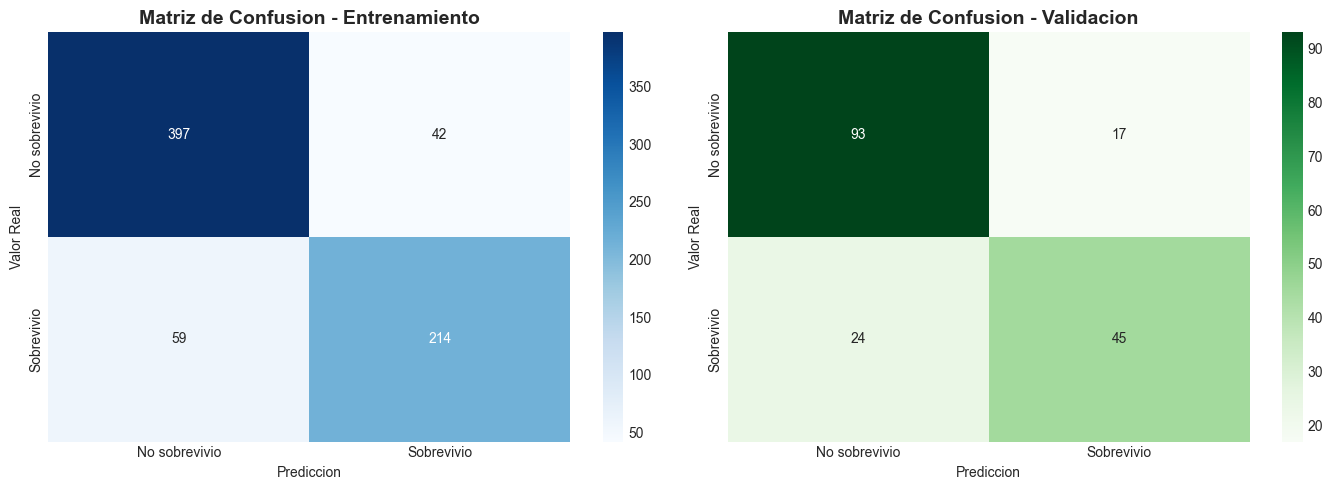

✓ Matriz de confusion guardada: 02_matriz_confusion.png


In [6]:
# ============================================================================
# 5. VISUALIZACIONES - MATRIZ DE CONFUSION
# ============================================================================

print("\n" + "="*80)
print("5. GENERANDO VISUALIZACIONES")
print("="*80)

# --- MATRIZ DE CONFUSION ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['No sobrevivio', 'Sobrevivio'],
            yticklabels=['No sobrevivio', 'Sobrevivio'])
axes[0].set_title('Matriz de Confusion - Entrenamiento', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Valor Real')
axes[0].set_xlabel('Prediccion')

sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', ax=axes[1],
            xticklabels=['No sobrevivio', 'Sobrevivio'],
            yticklabels=['No sobrevivio', 'Sobrevivio'])
axes[1].set_title('Matriz de Confusion - Validacion', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Valor Real')
axes[1].set_xlabel('Prediccion')

plt.tight_layout()
plt.savefig('02_matriz_confusion.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Matriz de confusion guardada: 02_matriz_confusion.png")

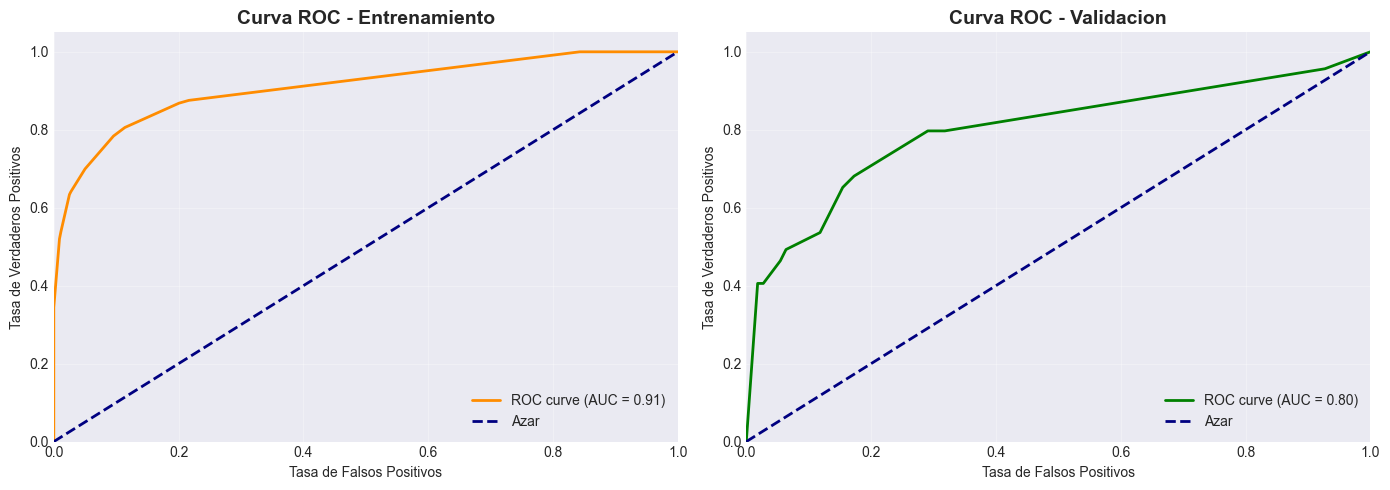


✓ Curvas ROC guardadas: 02b_curvas_roc.png
  ROC-AUC Score (Train): 0.9091
  ROC-AUC Score (Test):  0.7997


In [7]:
# ============================================================================
# 6. VISUALIZACIONES - CURVAS ROC
# ============================================================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Train
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
roc_auc_train = roc_auc_score(y_train, y_train_proba)

axes[0].plot(fpr_train, tpr_train, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc_train:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('Tasa de Falsos Positivos')
axes[0].set_ylabel('Tasa de Verdaderos Positivos')
axes[0].set_title('Curva ROC - Entrenamiento', fontsize=14, fontweight='bold')
axes[0].legend(loc="lower right")
axes[0].grid(True, alpha=0.3)

# ROC Test
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
roc_auc_test = roc_auc_score(y_test, y_test_proba)

axes[1].plot(fpr_test, tpr_test, color='green', lw=2, 
             label=f'ROC curve (AUC = {roc_auc_test:.2f})')
axes[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Azar')
axes[1].set_xlim([0.0, 1.0])
axes[1].set_ylim([0.0, 1.05])
axes[1].set_xlabel('Tasa de Falsos Positivos')
axes[1].set_ylabel('Tasa de Verdaderos Positivos')
axes[1].set_title('Curva ROC - Validacion', fontsize=14, fontweight='bold')
axes[1].legend(loc="lower right")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('02b_curvas_roc.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n✓ Curvas ROC guardadas: 02b_curvas_roc.png")
print(f"  ROC-AUC Score (Train): {roc_auc_train:.4f}")
print(f"  ROC-AUC Score (Test):  {roc_auc_test:.4f}")


IMPORTANCIA DE CARACTERISTICAS:
      Feature  Importance
1         Sex    0.537665
0      Pclass    0.182787
5        Fare    0.116335
2         Age    0.103094
6  FamilySize    0.053059
4       Parch    0.007061
3       SibSp    0.000000
7     IsAlone    0.000000


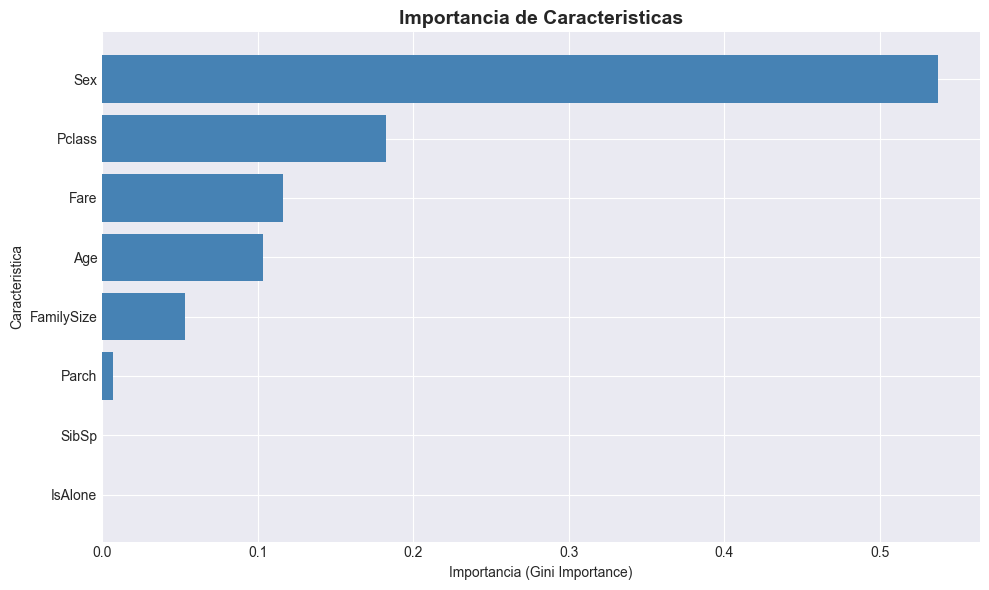


✓ Importancia de features guardada: 03_feature_importance.png


In [8]:
# ============================================================================
# 7. VISUALIZACIONES - IMPORTANCIA DE CARACTERISTICAS
# ============================================================================

# Obtener importancia de features
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nIMPORTANCIA DE CARACTERISTICAS:")
print(feature_importance)

# Grafico de importancia
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'][::-1], feature_importance['Importance'][::-1], 
         color='steelblue')
plt.title('Importancia de Caracteristicas', fontsize=14, fontweight='bold')
plt.xlabel('Importancia (Gini Importance)')
plt.ylabel('Caracteristica')
plt.tight_layout()
plt.savefig('03_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Importancia de features guardada: 03_feature_importance.png")


Generando visualizacion del arbol de decision...


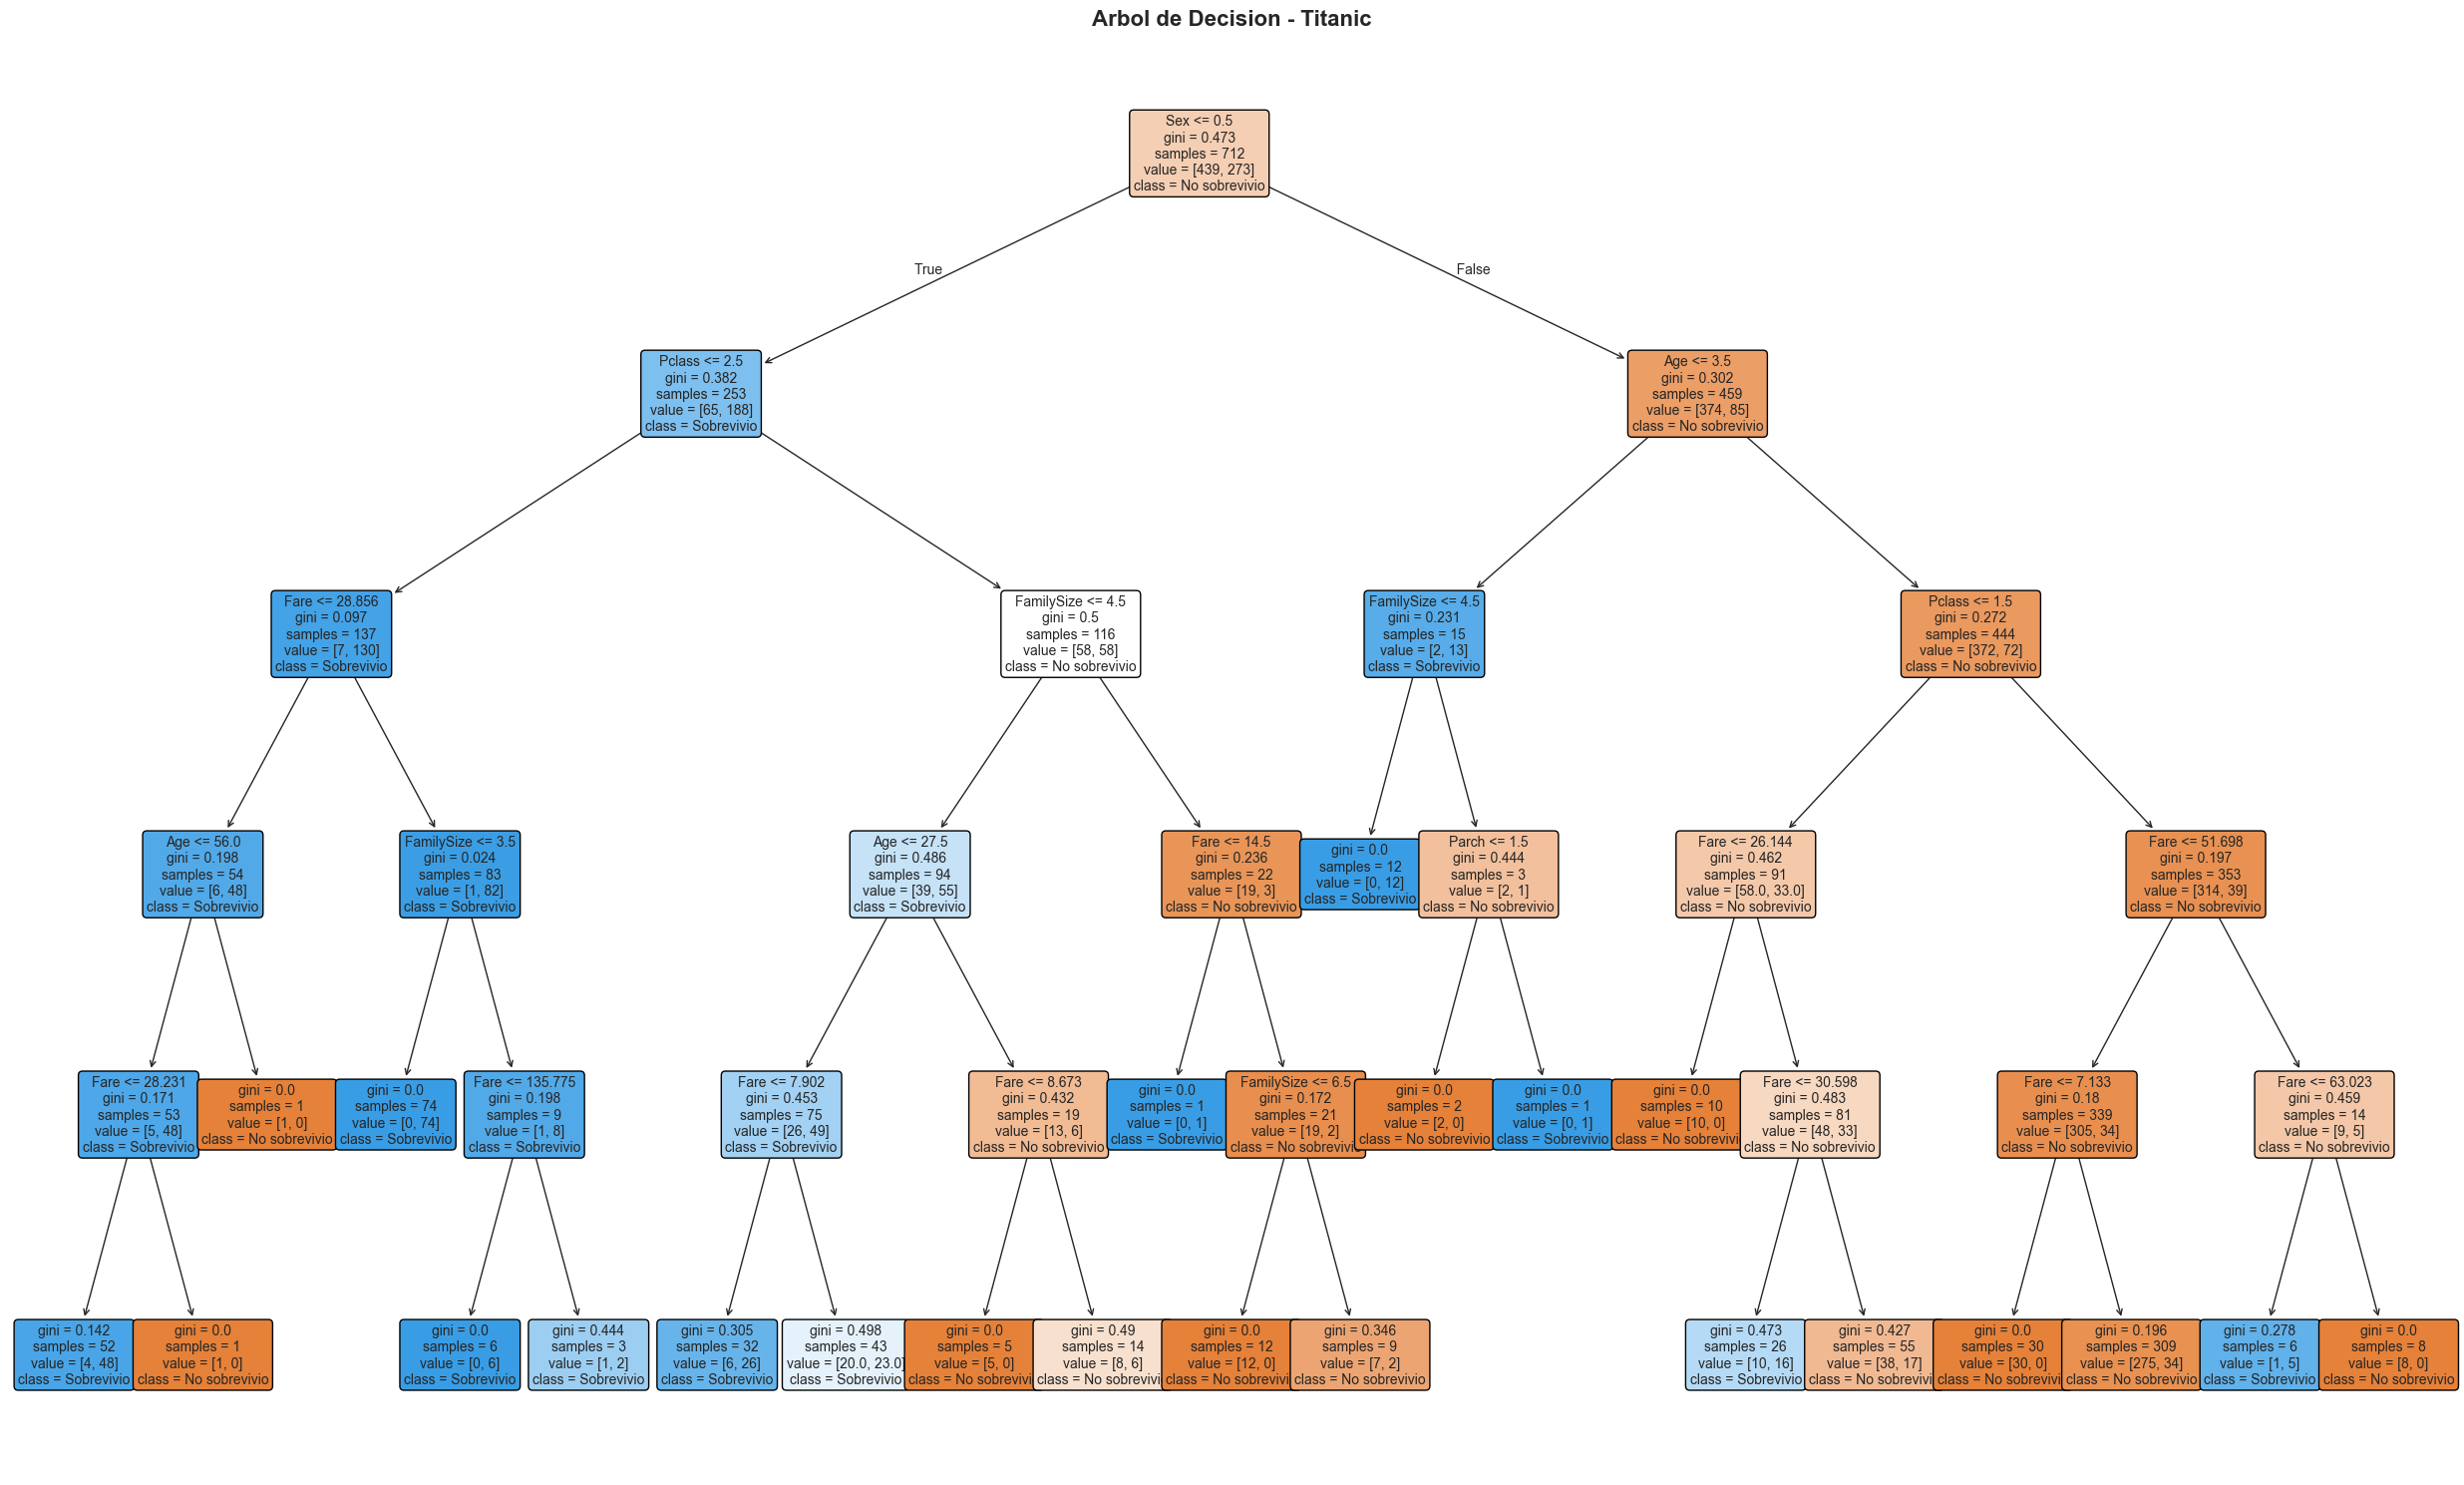

✓ Visualizacion del arbol guardada: 04_arbol_decision.png


In [9]:
# ============================================================================
# 8. VISUALIZACION DEL ARBOL DE DECISION
# ============================================================================

print("\nGenerando visualizacion del arbol de decision...")

plt.figure(figsize=(25, 15))
plot_tree(model, 
          feature_names=X.columns,
          class_names=['No sobrevivio', 'Sobrevivio'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Arbol de Decision - Titanic', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('04_arbol_decision.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualizacion del arbol guardada: 04_arbol_decision.png")

In [10]:
# ============================================================================
# 9. PREDICCION EN CONJUNTO DE PRUEBA DE KAGGLE
# ============================================================================

print("\n" + "="*80)
print("9. GENERANDO PREDICCIONES PARA KAGGLE")
print("="*80)

# Cargar PassengerId original del test
df_test_original = pd.read_csv(r"..\data\test.csv")

# Hacer predicciones
predicciones = model.predict(df_test_prep)

# Crear archivo de submission
submission = pd.DataFrame({
    'PassengerId': df_test_original['PassengerId'],
    'Survived': predicciones
})

submission.to_csv('submission_arbol_decision.csv', index=False)

print("\n✓ Archivo 'submission_arbol_decision.csv' generado")
print(f"  Total de predicciones: {len(predicciones)}")
print(f"  Sobrevivientes predichos: {predicciones.sum()} ({predicciones.mean()*100:.2f}%)")

print("\n" + "="*80)
print("PROCESO COMPLETADO EXITOSAMENTE")
print("="*80)


9. GENERANDO PREDICCIONES PARA KAGGLE

✓ Archivo 'submission_arbol_decision.csv' generado
  Total de predicciones: 418
  Sobrevivientes predichos: 149 (35.65%)

PROCESO COMPLETADO EXITOSAMENTE


In [11]:
# ============================================================================
# 10. RESUMEN DE RESULTADOS
# ============================================================================

print("\n" + "="*80)
print("RESUMEN DE RESULTADOS")
print("="*80)

print("\nArbol de Decision")
print("   Hiperparametros:")
print(f"   - max_depth: {model.max_depth}")
print(f"   - criterion: {model.criterion}")
print(f"   - min_samples_split: {model.min_samples_split}")
print(f"   - min_samples_leaf: {model.min_samples_leaf}")

print("\nMETRICAS:")
print(f"   - Accuracy:  {acc_test:.4f}")
print(f"   - Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"   - Recall:    {recall_score(y_test, y_test_pred):.4f}")
print(f"   - F1-Score:  {f1_score(y_test, y_test_pred):.4f}")
print(f"   - ROC-AUC:   {roc_auc_test:.4f}")

print("\nFEATURES MAS IMPORTANTES:")
for i, row in feature_importance.head(3).iterrows():
    print(f"   {row['Feature']:12s}: {row['Importance']:.4f}")



RESUMEN DE RESULTADOS

📊 MODELO: Arbol de Decision
   Hiperparametros:
   - max_depth: 5
   - criterion: gini
   - min_samples_split: 2
   - min_samples_leaf: 1

📈 METRICAS (Validacion):
   - Accuracy:  0.7709
   - Precision: 0.7258
   - Recall:    0.6522
   - F1-Score:  0.6870
   - ROC-AUC:   0.7997

🔍 TOP 3 FEATURES MAS IMPORTANTES:
   Sex         : 0.5377
   Pclass      : 0.1828
   Fare        : 0.1163

📁 ARCHIVOS GENERADOS:
   - 02_matriz_confusion.png
   - 02b_curvas_roc.png
   - 03_feature_importance.png
   - 04_arbol_decision.png
   - submission_arbol_decision.csv
